# PARTE 1 - REGRESSÃO LINEAR SIMPLES

Carregue o conjunto de dados de gorjetas. Faça o que se pede:
1. Utilizando a biblioteca scikit-learn, treine um modelo de regressão linear que receba como entrada o valor total da conta (total_bill) e faça a predição do valor da gorjeta (tip).
2. Mostre na tela o valor da função custo (erro médio quadrático / MSE) para o modelo treinado
3. Mostre na tela os valores dos pesos (parâmetros).
4. Para um valor de entrada de 30, qual a predição do modelo?
5. Crie uma visualização que mostra no mesmo plot o scatterplot entre a entrada e a saída e a linha de regressão aprendida pelo modelo. E.g.:

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Questão 1
Utilizando a biblioteca scikit-learn, treine um modelo de regressão linear que receba como entrada o valor total da conta (total_bill) e faça a predição do valor da gorjeta (tip).

In [17]:
x = df[['total_bill']]
y = df['tip']

In [18]:
x.shape

(244, 1)

In [19]:
y.shape

(244,)

In [20]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [21]:
# Construindo a predição do modelo
y_pred_model = model.predict(x)
print(y_pred_model[:20])

[2.70463616 2.00622312 3.12683472 3.40725019 3.5028225  3.57633966
 1.84133463 3.74332864 2.49983836 2.47253198 1.99887141 4.6234341
 2.53974767 2.85587147 2.47778321 3.1866987  2.00517288 2.631119
 2.70253567 3.0890259 ]


### Questão 2
Mostre na tela o valor da função custo (erro médio quadrático / MSE) para o modelo treinado

In [22]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y, y_pred_model))

Erro médio quadrático: 1.04


Complemento

In [23]:
# para visualizar o Coeficiente de Determinação
model.score(x,y)

0.45661658635167657

### Questão 3
Mostre na tela os valores dos pesos (parâmetros).

In [24]:
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):    {w1.round(5)}')

Coeficiente de interceptação(Peso w0): 0.9203
Coeficiente de inclinação(Peso w1):    [0.10502]


### Questão 4
Para um valor de entrada de 30, qual a predição do modelo?

In [25]:
#Predição do modelo com o valor de entrada 30
model.predict([[30]])

array([4.07100514])

### Questão 5
Crie uma visualização que mostra no mesmo plot o scatterplot entre a entrada e a saída e a linha de regressão aprendida pelo modelo.

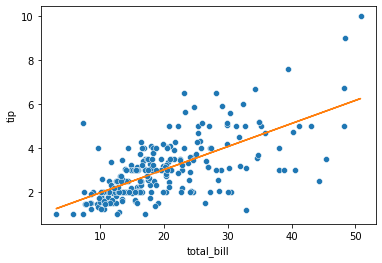

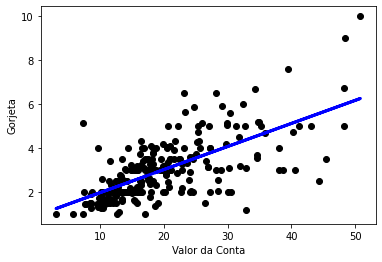

In [26]:
# Plotar com scatterplot
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred_model, color='blue', linewidth=3)
plt.xlabel('Valor da Conta')
plt.ylabel('Gorjeta')
plt.show()

# === Desafio === 
1. Para o mesmo conjunto de dados de gorjetas, treine um modelo de regressão linear implementando o algoritmo de gradiente descendente utilizando Numpy. Pode ser utilizado o gradiente descendente em batch ou o estocástico.
2. Crie um gráfico que mostre o valor da função custo decaindo após cada iteração do treinamento. Plote ao menos 3 exemplos de treinamento com diferentes passos de aprendizagem. E.g.:
3. Mostre as mesmas informações pedidas nas questões anteriores sobre a regressão linear criada com scikit-learn: MSE, pesos, predição para o valor 30 e o plot da reta aprendida. Compare com os resultados do modelo treinado com o scikit-learn.


# Gradiente descedente Estocástico

### Questão 1
Para o mesmo conjunto de dados de gorjetas, treine um modelo de regressão linear implementando o algoritmo de gradiente descendente utilizando Numpy. Pode ser utilizado o gradiente descendente em batch ou o estocástico.

In [27]:
X = df['total_bill']
y = df['tip']
#Definindo a função custo
def  cal_cost(theta,X,y):
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y)) #Definição do cálculo da função de custo
    return cost

In [28]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations): #qtd de vezes que passa pelos dados
        cost =0.0
        for i in range(m): #Vai de dado em dado
            rand_ind = np.random.randint(0,m) #definindo dado aleatório randomicamente
            X_i = X[rand_ind,:].reshape(1,X.shape[1]) #entrada randômica
            y_i = y[rand_ind].reshape(1,1) #saída randômica
            prediction = np.dot(X_i,theta) #multiplicação 

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i))) #atualizando os coeficientes(pesos)
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

### Questão 2
Crie um gráfico que mostre o valor da função custo decaindo após cada iteração do treinamento. Plote ao menos 3 exemplos de treinamento com diferentes passos de aprendizagem.

In [29]:
lr =0.0001 #Definindo a taxa de aprendizagem
n_iter1 = 100 #Definindo número de interações

theta = np.random.randn(2,1) #Gerando o teta(pesos) randomicamente

X_b = np.c_[np.ones((len(X),1)),X] #Criando uma matriz de 1's para fazer a multiplicação com o peso w0
theta,cost_history1 = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter1)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history1[-1]))

Theta0:          1.339
Theta1:          0.076
Final cost/MSE:  157.443


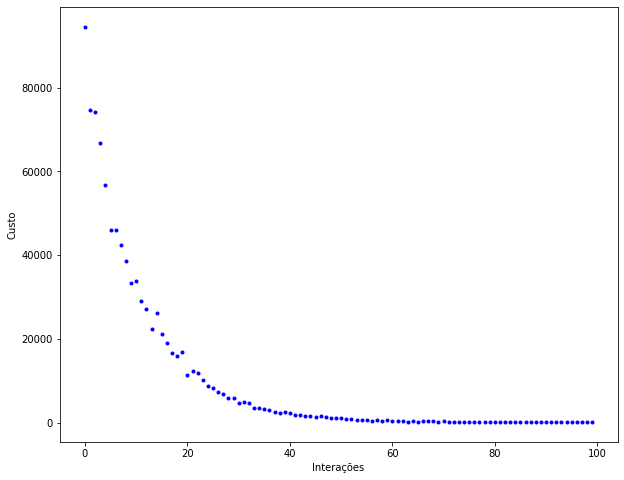

In [30]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Custo')
ax.set_xlabel('Interações')

ax.plot(range(n_iter1),cost_history1,'b.');

In [31]:
lr =0.001 #Definindo a taxa de aprendizagem
n_iter2 = 100 #Definindo número de interações

theta = np.random.randn(2,1) #Gerando o teta(pesos) randomicamente

X_b = np.c_[np.ones((len(X),1)),X]#Criando uma matriz de 1's para fazer a multiplicação com o peso w0
theta,cost_history2 = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter2)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history2[-1]))

Theta0:          -0.664
Theta1:          0.167
Final cost/MSE:  160.457


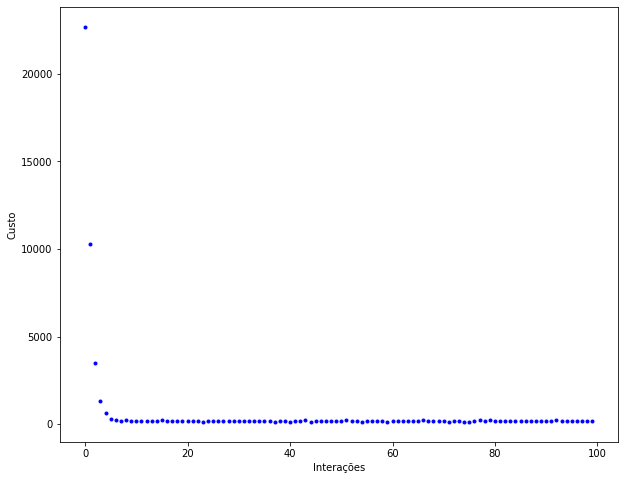

In [32]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Custo')
ax.set_xlabel('Interações')


ax.plot(range(n_iter2),cost_history2,'b.');

In [33]:
lr =0.0003 #Definindo taxa de aprendizagem
n_iter3 = 100 #Definindo número de interações

theta = np.random.randn(2,1) #Gerando o teta(pesos) randomicamente

X_b = np.c_[np.ones((len(X),1)),X]#Criando uma matriz de 1's para fazer a multiplicação com o peso w0
theta,cost_history3 = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter3)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history3[-1]))

Theta0:          -0.443
Theta1:          0.161
Final cost/MSE:  175.126


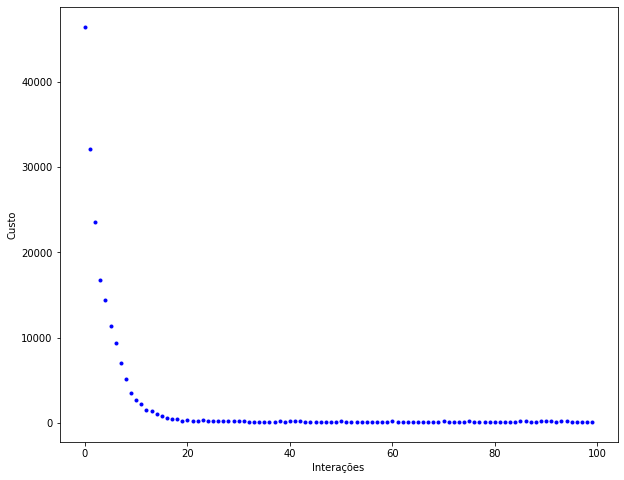

In [34]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Custo')
ax.set_xlabel('Interações')

ax.plot(range(n_iter3),cost_history3,'b.');

# PARTE 2 - Regressão Linear Múltipla
Considere o conjunto de dados disponibilizado neste link. Os dados referem-se às casas encontradas em um determinado distrito da Califórnia e a algumas estatísticas resumidas sobre elas com base nos dados do censo de 1990. Considere que haja um problema de regressão no qual desejamos criar um modelo que faça a predição do valor mediano das casas de um distrito ('median_house_value') com base em outras informações. Crie pelo menos 3 modelos que façam essa predição utilizando mais de uma variável de entrada e compare a diferença de MSE. Qual o melhor modelo encontrado? Justifique a escolha das variáveis.

In [35]:
df_house = pd.read_csv('california_housing_train.csv')
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [36]:
df_house.describe();

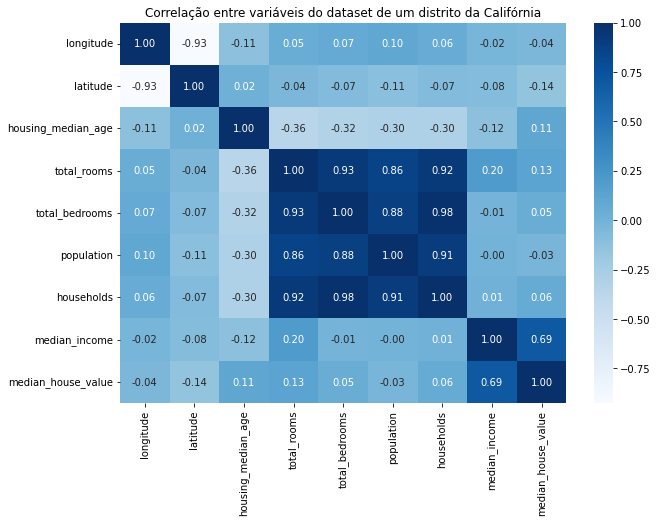

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(df_house.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de um distrito da Califórnia')
plt.show()

### Modelo 1
No primeiro modelo escolhido, as features de entrada serão: 'media_income' e 'hounsing_median_age' por apresentarem na matriz de correlação, uma correlação relevante com a variável de saída 'median_house_value'.

In [38]:
X = df_house[['median_income','housing_median_age']]
y = df_house['median_house_value']

In [39]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, y)
# Construindo a predição do modelo
y_pred_model = model.predict(X)

In [40]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X, y))

Erro médio quadrático: 6535814191.46
Coeficiente de interceptação(Peso w0): -11131.3643
Coeficiente de inclinação(Peso w1):  [43389.52463  1746.30287]
Coeficiente de determinação: 0.5141179623105907


### Modelo 2
Aqui utilizarei todas as features possíveis como entrada para ver o comportamento do modelo com todas elas como entrada.
Obviamente, tendo como saída a predição valor mediano das casas de um distrito ('median_house_value').


In [41]:
X = df_house.drop(['median_house_value'], axis = 1) 
y = df_house.median_house_value #Definindo somente a 'median_house_value' como saída
X;

In [42]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, y)
# Construindo a predição do modelo
y_pred_model = model.predict(X)

In [43]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X, y))

Erro médio quadrático: 4824523173.93
Coeficiente de interceptação(Peso w0): -3620600.8930
Coeficiente de inclinação(Peso w1):  [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825000e+00
  1.17648540e+02 -3.84887700e+01  4.54360000e+01  4.05070684e+04]
Coeficiente de determinação: 0.6413378529502689


### Modelo 3
Aplicando o Recursive Feature Elimination - RFE para definição das features escolhidas:
- O RFE constrói modelos à partir da remoções de features
- Utiliza a acurácia do modelo para identificar atributos ou a combinação destes que melhor contribui para se ter uma melhor perfomance 
- Em grandes bases de dados o tempo de processamento pode ser um problema 

In [44]:
from sklearn.feature_selection import RFE
X = df_house.drop(['median_house_value'], axis = 1)
y = df_house.median_house_value
X;
model = LinearRegression()
rfe = RFE(model, n_features_to_select=4) #Definindo a quantidade de atributos(features) que devem ser selecionadas pelo RFE e também a instanciação, no caso o model(regressão linear)

In [45]:
fit = rfe.fit(X,y) #Entregando os dados para o rfe, que vai fazer a criação do modelo e fazer os testes levando em consideração, a acurácia. Definindo isso tudo na variável fit

In [46]:
print("Número de features escolhidas: {}".format(fit.n_features_))

Número de features escolhidas: 4


In [47]:
colunas = fit.get_support(indices=True) 
df_house.iloc[:,colunas] #imprimindo o df_house trazendo as features que o método RFE considera como as melhores

,longitude,latitude,housing_median_age,median_income
0,-114.31,34.19,15.0,1.4936
1,-114.47,34.40,19.0,1.8200
2,-114.56,33.69,17.0,1.6509
3,-114.57,33.64,14.0,3.1917
4,-114.57,33.57,20.0,1.9250
...,...,...,...,...
16995,-124.26,40.58,52.0,2.3571
16996,-124.27,40.69,36.0,2.5179
16997,-124.30,41.84,17.0,3.0313
16998,-124.30,41.80,19.0,1.9797


In [48]:
# Redefinindo as entradas à partir da filtragem com o RFE
X = df_house.iloc[:,colunas]
y = df_house['median_house_value']

In [49]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, y)
# Construindo a predição do modelo
y_pred_model = model.predict(X)

In [50]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X, y))

Erro médio quadrático: 5406096300.11
Coeficiente de interceptação(Peso w0): -3791572.4718
Coeficiente de inclinação(Peso w1):  [-45241.04705 -44497.77956    953.27001  38044.41152]
Coeficiente de determinação: 0.5981028515659096


##### Tendo como base, o erro quadrático médio e o coeficiente de determinação como complemento, o modelo que apresentou o melhor resultado, foi o Modelo 2, em que utilizei como entrada, todas as features disponíveis (comentar sobre isso). A sequência, ficou:
##### 1. Modelo 2 
##### 2. Modelo 3
##### 3. Modelo 1

# PARTE 3 - Regressão Polinomial
Considerando o mesmo problema tratado na Parte 2, treine modelos de regressão utilizando transformações não-lineares dos atributos (x², x³, etc...). Pode-se utilizar transformações em um ou mais atributos. Treine pelo menos 3 modelos diferentes e faça o plot das curvas de regressão comparada com o scatterplot (análogo ao que foi feito na questão 5 da Parte 1). Calcule o MSE para cada um dos modelos. Qual modelo se ajustou melhor aos dados em termos de MSE?


### Modelo 1
Utilizarei como entradas, as features: 'media_income' e 'hounsing_median_age' por apresentarem na matriz de correlação, uma correlação relevante com a variável de saída 'median_house_value'.


In [56]:
X = df_house[['median_income','housing_median_age']]
y = df_house['median_house_value']

X_poly = np.hstack((X,X**2,X**3))

model = LinearRegression()

model.fit(X_poly,y)

y_pred_model = model.predict(X_poly)

#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X_poly, y))

Erro médio quadrático: 6272560971.92
Coeficiente de interceptação(Peso w0): -5354.829441326321
Coeficiente de inclinação(Peso w1):  [ 1.82512279e+04  5.44772642e+03  6.05165255e+03 -1.72856200e+02
 -3.70943180e+02  2.23936000e+00]
Coeficiente de determinação: 0.5336885937561535


### Modelo 2
Utilizarei como entradas, as features que com a aplicação do método RFE, foram consideradas melhores, sendo elas: 'longitude','latitude','housing_median_age','median_income'

In [55]:
# Redefinindo as entradas à partir da filtragem com o RFE
X = df_house.iloc[:,colunas]
y = df_house['median_house_value']
X_poly = np.hstack((X,X**2,X**3))

model = LinearRegression()

model.fit(X_poly,y)

y_pred_model = model.predict(X_poly)

#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X_poly, y))

Erro médio quadrático: 5113703578.26
Coeficiente de interceptação(Peso w0): 873600528.1546502
Coeficiente de inclinação(Peso w1):  [ 2.28375953e+07  2.23089642e+06  4.83220740e+03  4.68405219e+03
  1.92994576e+05 -6.46935756e+04 -1.96505030e+02  6.97399820e+03
  5.42288240e+02  6.09926490e+02  2.64548000e+00 -3.87345460e+02]
Coeficiente de determinação: 0.6198397564620397


### Modelo 3
No primeiro modelo escolhido, a feature de entrada será: 'media_income'

In [51]:
X = df_house['median_income'].values.reshape(-1,1)
y = df_house['median_house_value'].values.reshape(-1,1)

X_poly = np.hstack((X,X**2,X**3))

model = LinearRegression()

model.fit(X_poly,y)

y_pred_model = model.predict(X_poly)

#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X_poly, y))



Erro médio quadrático: 6844400238.89
Coeficiente de interceptação(Peso w0): [75138.94311659]
Coeficiente de inclinação(Peso w1):  [[15095.08877  6050.3056   -353.91044]]
Coeficiente de determinação: 0.49117722177908874


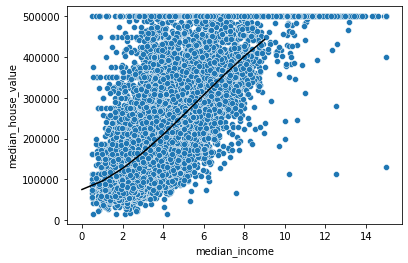

In [52]:
sns.scatterplot(x='median_income', y='median_house_value', data=df_house)
x = np.arange(0,10).reshape(-1,1)
x = np.hstack((x,x**2,x**3))
y_pred_model = model.predict(x).flatten()
plt.plot(np.arange(0,10), y_pred_model, color='black');

##### Tendo como base, o erro quadrático médio e o coeficiente de determinação como complemento, o modelo que apresentou o melhor resultado, foi o Modelo 2, em que utilizei como entrada,as features que com a aplicação do método RFE, foram consideradas melhores, sendo elas: 'longitude','latitude','housing_median_age','median_income'. A sequência, ficou:
##### 1. Modelo 2 
##### 2. Modelo 1
##### 3. Modelo 3